In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Reading Data

In [3]:
lead_score = pd.read_csv("C:\\Users\\praya\\Downloads\\Lead+Scoring+Case+Study\\Lead Scoring Assignment\\Leads.csv")
lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
print('Shape of the data frame is' ,lead_score.shape)

Shape of the data frame is (9240, 37)


In [5]:
print('So there are' , lead_score.shape[0] , 'rows and' , lead_score.shape[1] , 'columns')

So there are 9240 rows and 37 columns


In [6]:
if lead_score.duplicated().sum()>0 :
    print ('There is duplicate value present')

else :
    print ('There is no duplicate value present')

There is no duplicate value present


In [7]:
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
lead_score.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Cleaning Data

As mentioned in the Problem Statement, many of the categorical variables have a level called **`'Select'`** **which needs to be handled because it is as good as a null value.** One of the reason might be is that the customer did not select any option from the list and hence for such columns the data remained as default 'Select' for Select. 

In [9]:
select_columns = lead_score.columns[lead_score.isin(['Select']).any()]
select_columns

Index(['Specialization', 'How did you hear about X Education', 'Lead Profile',
       'City'],
      dtype='object')

In [10]:
lead_score[select_columns] = lead_score[select_columns].replace('Select' , np.nan)

In [11]:
select_columns2 = lead_score.columns[lead_score.isin(['Select']).any()]
select_columns2

Index([], dtype='object')

In [12]:
lead_score.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [13]:
missing_percent = (round(lead_score.isnull().sum()/len(lead_score)*100,2)).sort_values(ascending = False)
missing_percent

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [14]:
def drop_null_value( data , percentage = 40) :
    col_to_drop =missing_percent[ missing_percent>= percentage].index.to_list()
    print ('Total columns dropped =' , len(col_to_drop) ,'\n')
    print ('List of columns dropped =', col_to_drop ,'\n')
    print ('Shape of dataframe before dropping columns', data.shape ,'\n')
           
    data.drop (labels=col_to_drop,axis=1,inplace=True)

    print ('Shape of dataframe after dropping columns', data.shape,'\n')



In [15]:
drop_null_value(lead_score)

Total columns dropped = 7 

List of columns dropped = ['How did you hear about X Education', 'Lead Profile', 'Lead Quality', 'Asymmetrique Profile Score', 'Asymmetrique Activity Score', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index'] 

Shape of dataframe before dropping columns (9240, 37) 

Shape of dataframe after dropping columns (9240, 30) 



In [16]:
missing_percent2 = (round(lead_score.isnull().sum()/len(lead_score)*100,2)).sort_values(ascending = False)
missing_percent2

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
Prospect ID                                       0.00
Newspaper                                         0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Digital Ad

In [17]:
#checking columns still having slight missing values
#Categorical

cols = ['City', 'Specialization', 'Tags',
       'What matters most to you in choosing a course',
       'What is your current occupation', 'Country','Last Activity','Lead Source']

In [18]:
for col in cols:
    val_percent = lead_score[col].value_counts(normalize=True)*100
    print('Value counts %  for = ' ,col ,'\n')
    print(val_percent ,'\n')
    print('---'*40 )
    

Value counts %  for =  City 

City
Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: proportion, dtype: float64 

------------------------------------------------------------------------------------------------------------------------
Value counts %  for =  Specialization 

Specialization
Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                

### Insights : 
 1. City : Mumbai has almost 58% data , skewed , dropped
 2. Specialization : not skewed , can label the missing values as others
 3. Tags : not much resourceful , dropped
 4. What matters most to you in choosing a course : highly skewed , dropped
 5. What is your current occupation : insightful for business context , impute missing values with Unemployed as it has the highest values
 6. Country : highly skewed ,  not much resourceful, dropped
 7. Last Activity : impute missing values with Email Opened as it has the highest values
 8. Lead Source : impute missing values with Google as it has the highest values

In [19]:
columns_to_be_dropped = ['City' , 'Tags' , 'What matters most to you in choosing a course' ,'Country' ]

In [20]:
lead_score = lead_score.drop(lead_score[columns_to_be_dropped],axis=1)

In [21]:
lead_score.shape

(9240, 26)

In [22]:
lead_score['Specialization'] = lead_score['Specialization'].fillna('Others')
lead_score['What is your current occupation'] = lead_score['What is your current occupation'].fillna('Unemployed')
lead_score['Last Activity'] = lead_score['Last Activity'].fillna('Email Opened')
lead_score['Lead Source'] = lead_score['Lead Source'].fillna('Google')

In [23]:
missing_percent3 = (round(lead_score.isnull().sum()/len(lead_score)*100,2)).sort_values(ascending = False)
missing_percent3

TotalVisits                                 1.48
Page Views Per Visit                        1.48
Prospect ID                                 0.00
Magazine                                    0.00
A free copy of Mastering The Interview      0.00
I agree to pay the amount through cheque    0.00
Get updates on DM Content                   0.00
Update me on Supply Chain Content           0.00
Receive More Updates About Our Courses      0.00
Through Recommendations                     0.00
Digital Advertisement                       0.00
Newspaper                                   0.00
X Education Forums                          0.00
Newspaper Article                           0.00
Search                                      0.00
Lead Number                                 0.00
What is your current occupation             0.00
Specialization                              0.00
Last Activity                               0.00
Total Time Spent on Website                 0.00
Converted           

In [24]:
#Numeric
print(lead_score['TotalVisits'].value_counts().head() ,'\n')
print(lead_score['Page Views Per Visit'].value_counts().head())

TotalVisits
0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
Name: count, dtype: int64 

Page Views Per Visit
0.0    2189
2.0    1795
3.0    1196
4.0     896
1.0     651
Name: count, dtype: int64


In [25]:
# imputing with mode
lead_score['TotalVisits'] = lead_score['TotalVisits'].fillna(lead_score['TotalVisits'].mode()[0])
lead_score['Page Views Per Visit'] = lead_score['Page Views Per Visit'].fillna(lead_score['Page Views Per Visit'].mode()[0])

In [26]:
missing_percent4 = (round(lead_score.isnull().sum()/len(lead_score)*100,2)).sort_values(ascending = False)
missing_percent4

Prospect ID                                 0.0
Lead Number                                 0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
Search                                      0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website                 0.0
TotalVisits                                 0.0
Converted                               

In [27]:
# one unique value

one_unique = (lead_score.loc[:, lead_score.nunique()==1].columns).to_list()
one_unique

['Magazine',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [28]:
# dropping ne unique

lead_score.drop(one_unique, axis=1, inplace=True)

In [29]:
lead_score.shape

(9240, 21)

### EDA

In [30]:
lead_score.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [31]:
# Removing columns that are not insightful

to_remove = ['Prospect ID' , 'Lead Number' , 'Last Notable Activity']
lead_score.drop(to_remove, axis=1, inplace=True)

In [32]:
cat_col = lead_score.select_dtypes(include=['object' , 'category']).columns
cat_col

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview'],
      dtype='object')

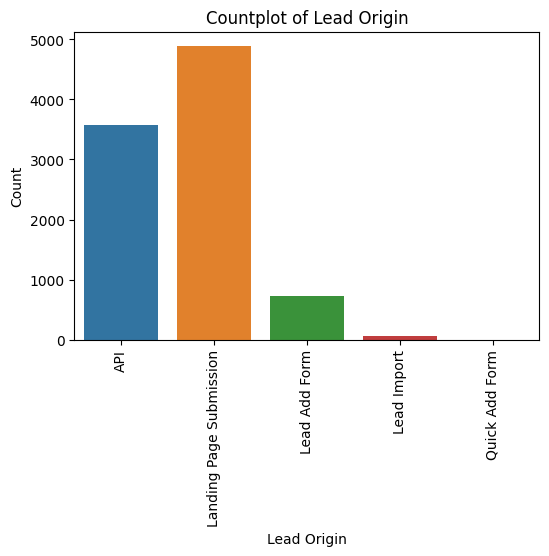

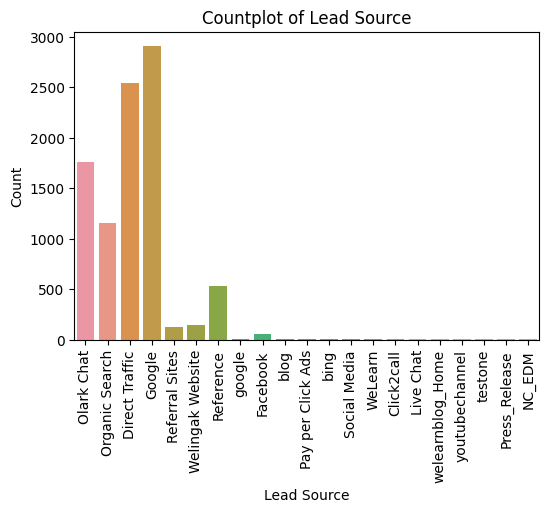

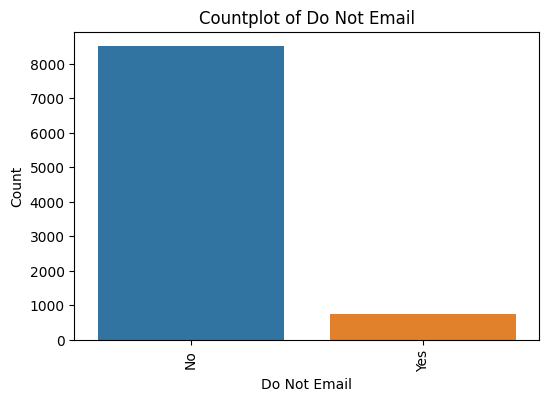

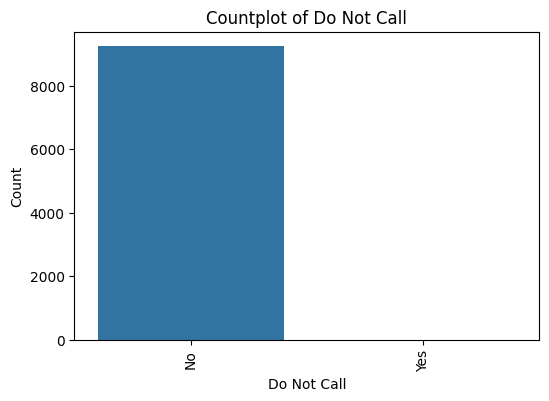

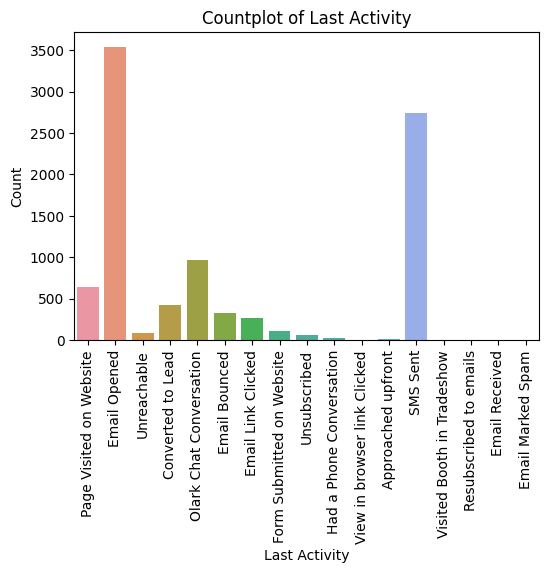

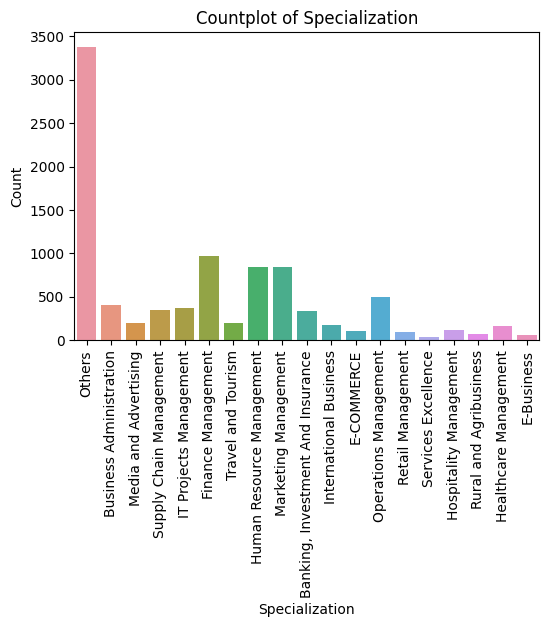

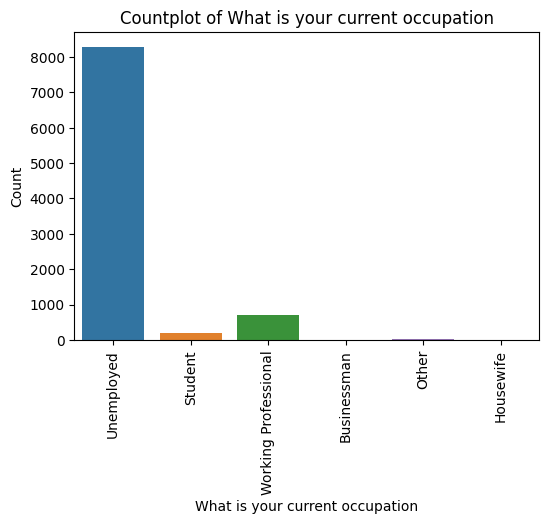

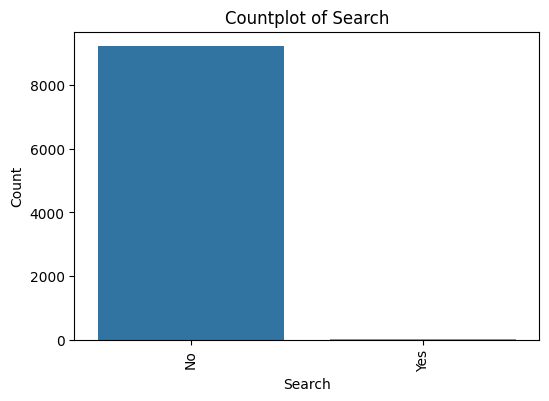

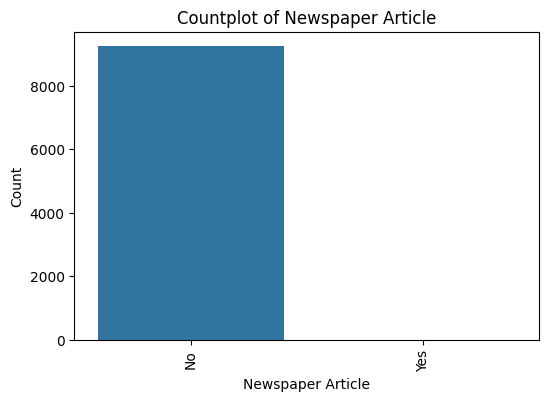

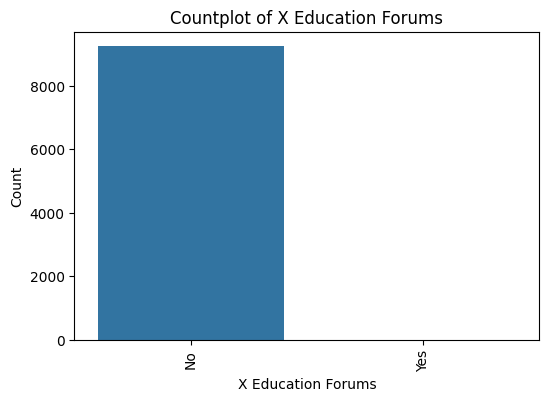

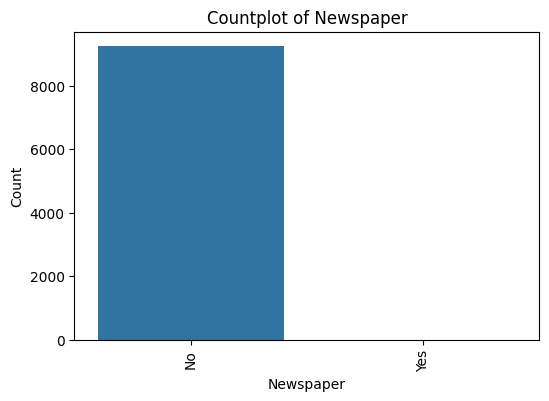

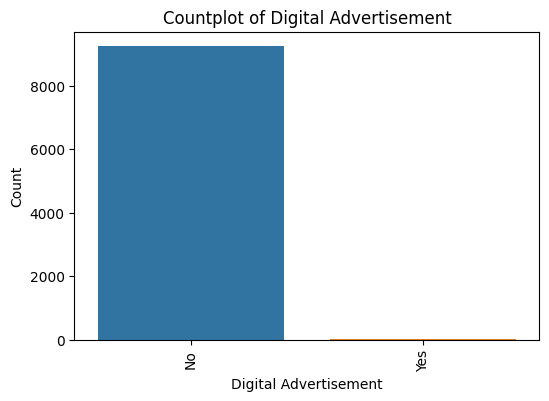

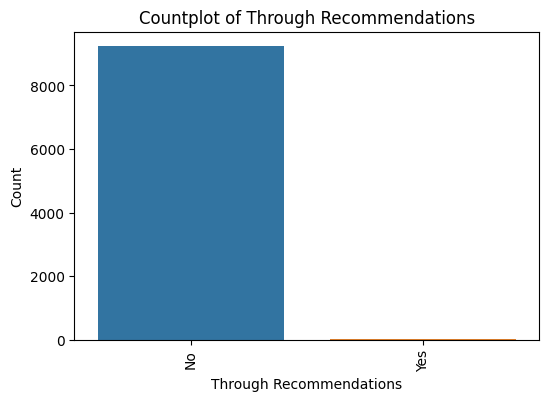

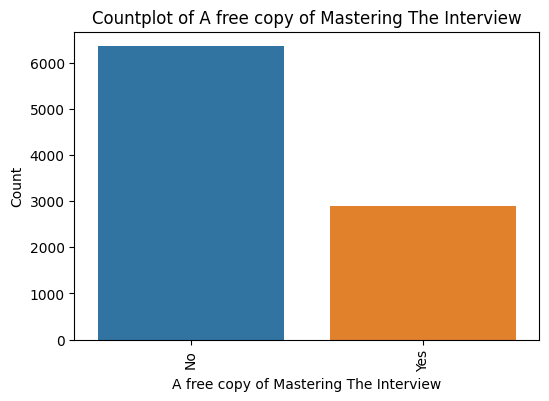

In [33]:
for col in cat_col:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=lead_score)  
    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')  
    plt.xticks(rotation=90)
    plt.show()

### Insight : Found skewed columns , dropping them

In [34]:
skewed =[ 'Do Not Call','Search', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations']

lead_score.drop(skewed, axis=1 , inplace= True)

In [35]:
lead_score.shape

(9240, 11)

### Outliers

In [36]:
num_col = lead_score.select_dtypes(['int' ,'float']).columns
num_col

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'],
      dtype='object')

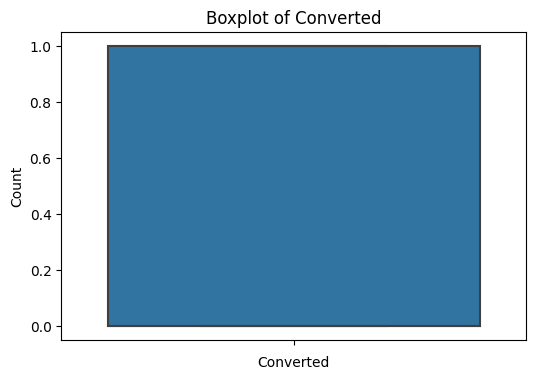

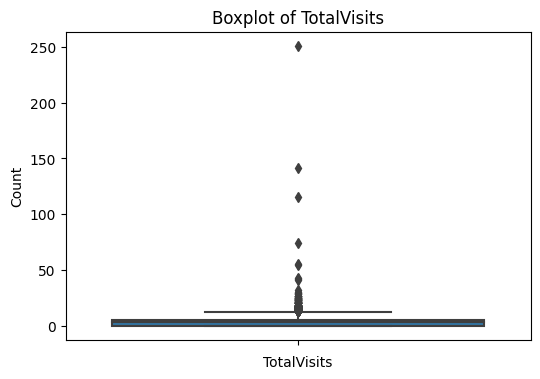

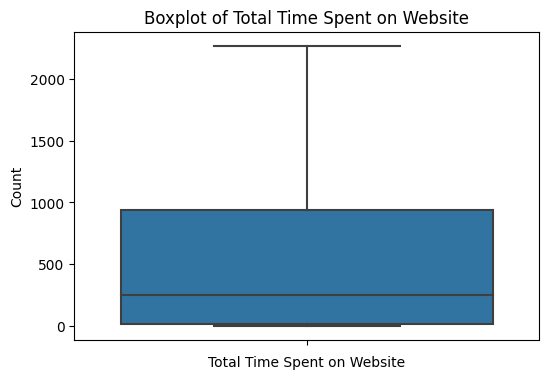

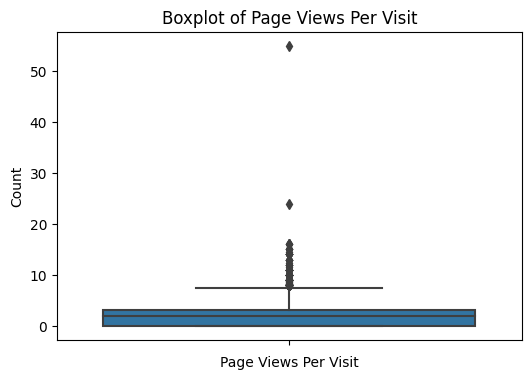

In [37]:
for col in num_col:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=col, data=lead_score)  
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')  
    plt.show()

### Capping Outliers for the treatment

In [38]:
col_to_cap =['TotalVisits','Page Views Per Visit']

In [39]:
def Outlier_treatment(df, col_to_cap):
    for i in col_to_cap:
        q1 = df[i].describe()["25%"]
        q3 = df[i].describe()["75%"]
        IQR = q3 - q1

        upper_bound = q3 + 1.5 * IQR
        lower_bound = q1 - 1.5 * IQR

        # Capping upper_bound
        df[i] = np.where(df[i] > upper_bound, upper_bound, df[i])

        # Flooring lower_bound
        df[i] = np.where(df[i] < lower_bound, lower_bound, df[i])



In [40]:
Outlier_treatment(lead_score,col_to_cap)

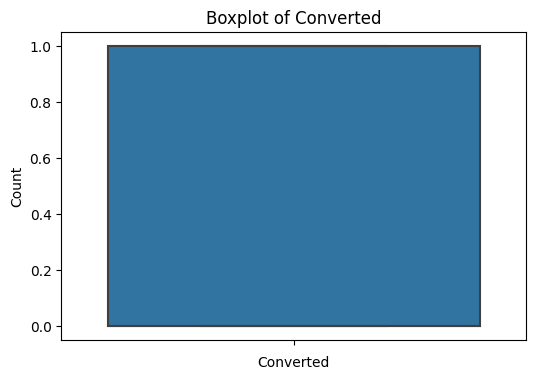

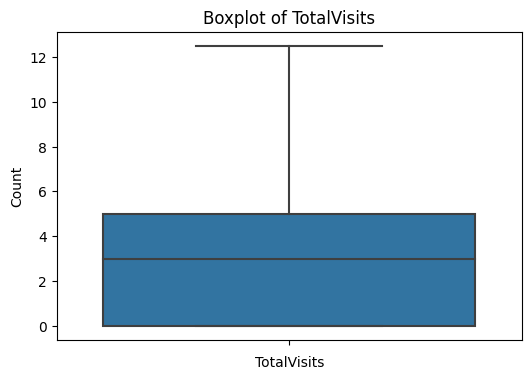

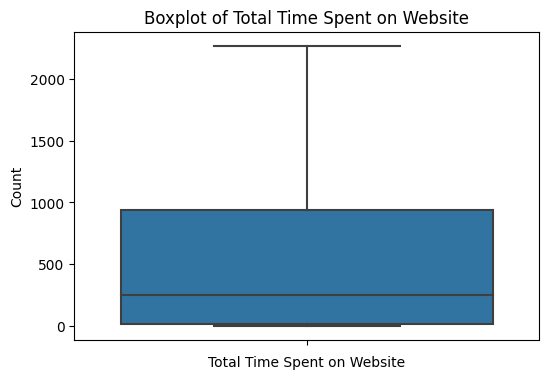

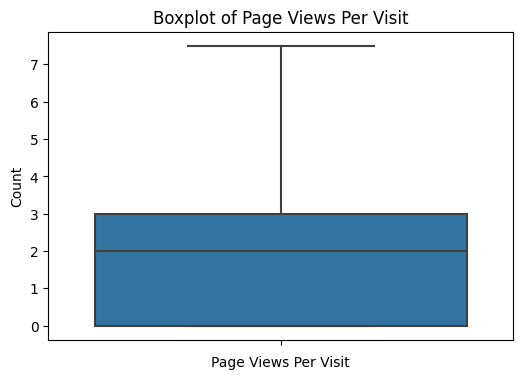

In [41]:
for col in num_col:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=col, data=lead_score)  
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')  
    plt.show()

In [42]:
cat_col2=lead_score.select_dtypes(['object','category']).columns

In [43]:
for col in cat_col2:
    val_percent = lead_score[col].value_counts(normalize=True)*100
    print('Value counts %  for = ' ,col ,'\n')
    print(val_percent ,'\n')
    print('---'*40 )
    

Value counts %  for =  Lead Origin 

Lead Origin
Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: proportion, dtype: float64 

------------------------------------------------------------------------------------------------------------------------
Value counts %  for =  Lead Source 

Lead Source
Google               31.428571
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeL

### Grouping Low frequency values
 
 1. Lead Source - Replace google with Google as they are the same and group smaller values to others
 2. Last Activity - Replace group smaller values to others

In [44]:
lead_score['Lead Source'] = lead_score['Lead Source'].replace('google','Google')
lead_score['Lead Source'] = lead_score['Lead Source'].replace(["bing","Click2call","Press_Release",
                                                           "Social Media","Live Chat","youtubechannel",
                                                           "testone","Pay per Click Ads","welearnblog_Home",
                                                           "WeLearn","blog","NC_EDM"],"Others")

In [45]:
lead_score['Last Activity'] = lead_score['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront',
                                                                 'View in browser link Clicked','Email Received','Email Marked Spam',
                                                                 'Visited Booth in Tradeshow', 'Resubscribed to emails'], 'Others')

In [46]:
print(lead_score['Lead Source'].value_counts(normalize=True)*100 ,'\n')
print(lead_score['Last Activity'].value_counts(normalize=True)*100)

Lead Source
Google              31.482684
Direct Traffic      27.521645
Olark Chat          18.993506
Organic Search      12.489177
Reference            5.779221
Welingak Website     1.536797
Referral Sites       1.352814
Facebook             0.595238
Others               0.248918
Name: proportion, dtype: float64 

Last Activity
Email Opened                 38.311688
SMS Sent                     29.707792
Olark Chat Conversation      10.530303
Page Visited on Website       6.926407
Converted to Lead             4.632035
Email Bounced                 3.528139
Email Link Clicked            2.889610
Others                        2.218615
Form Submitted on Website     1.255411
Name: proportion, dtype: float64


In [47]:
lead_score.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [48]:
lead_score.rename(columns={'What is your current occupation' : 'Current_occupation'} ,inplace=True)

In [49]:
lead_score.rename(columns={'A free copy of Mastering The Interview' : 'Free_copy'} ,inplace=True)

In [50]:
lead_score.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'Current_occupation', 'Free_copy'],
      dtype='object')

In [51]:
lead_score.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Current_occupation,Free_copy
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,No
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,No
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,No


In [52]:
# map Do Not Email and Free_copy

lead_score['Do Not Email'] = lead_score['Do Not Email'].map(lambda x : 1 if x == 'Yes' else 0)
lead_score['Free_copy'] = lead_score['Free_copy'].map(lambda x : 1 if x == 'Yes' else 0)

In [53]:
lead_score.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Current_occupation,Free_copy
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,0


In [54]:
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Lead Origin                  9240 non-null   object 
 1   Lead Source                  9240 non-null   object 
 2   Do Not Email                 9240 non-null   int64  
 3   Converted                    9240 non-null   int64  
 4   TotalVisits                  9240 non-null   float64
 5   Total Time Spent on Website  9240 non-null   int64  
 6   Page Views Per Visit         9240 non-null   float64
 7   Last Activity                9240 non-null   object 
 8   Specialization               9240 non-null   object 
 9   Current_occupation           9240 non-null   object 
 10  Free_copy                    9240 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 794.2+ KB


In [55]:
conversion_rate = round((sum(lead_score['Converted'])/len(lead_score['Converted']))*100,2)
conversion_rate

38.54

In [56]:
eda_category = lead_score.select_dtypes(include=['object']).columns
eda_numeric  = [ 'TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']

In [57]:
def Bivariate_cat(df, variable_name, Target="Converted"):
    # Create a figure and set title
    plt.figure(figsize=(14, 6))
    plt.suptitle("{} Countplot vs Lead Conversion Rates".format(variable_name), color="Brown", fontsize=16)

    # 1st subplot: Distribution of variable_name
    plt.subplot(1, 2, 1)
    plt.title("Distribution of {}".format(variable_name), color="blue")
    sns.countplot(x=variable_name, hue=Target, data=df, palette="prism_r", alpha=0.6)
    plt.xticks(rotation=90)
    plt.legend(["Not Converted", "Converted"], title="Converted")

    # Add percentages above bars in the countplot
    total = len(df[variable_name])
    for p in plt.gca().patches:
        text = '{:.1f}%'.format(100 * p.get_height() / total)
        plt.gca().annotate(text, (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='center', xytext=(0, 5), textcoords='offset points')

    # 2nd subplot: Lead Conversion Rate of variable_name
    plt.subplot(1, 2, 2)
    plt.title("Lead Conversion Rate of {}".format(variable_name), color="green", fontsize=12)
    sns.countplot(x=variable_name, hue=Target, data=df, palette="BuGn", alpha=0.85)
    
    # Modifications to the second subplot
    plt.xticks(rotation=90)
    plt.ylabel("Count", color='brown')
    plt.xlabel("{}".format(variable_name))
    plt.legend(labels=["Not Converted", "Converted"], title="Lead Conversion Rate")

    # Add percentages above bars in the countplot (Conversion rate)
    ax2 = plt.gca()
    all_heights = [[p.get_height() for p in bars] for bars in ax2.containers]
    for bars in ax2.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total):.1f}%'
            ax2.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11,
                          ha='center', va='bottom')

    # Adjust layout to prevent overlapping
    plt.tight_layout()
    plt.show()



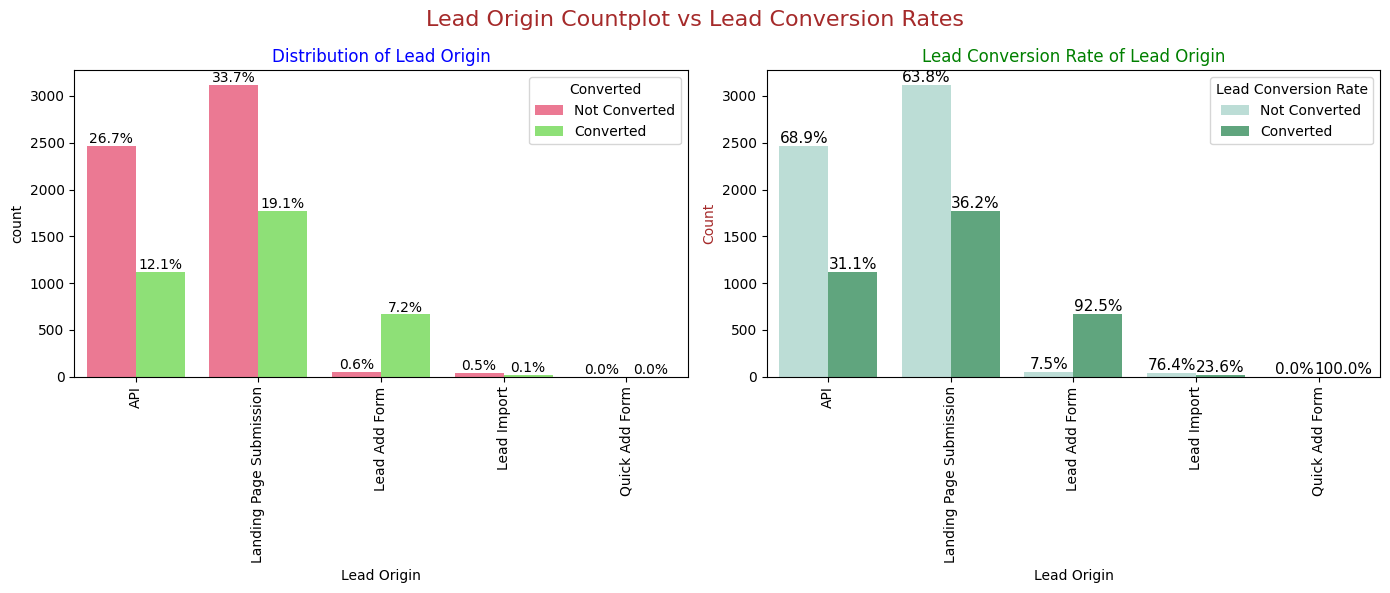

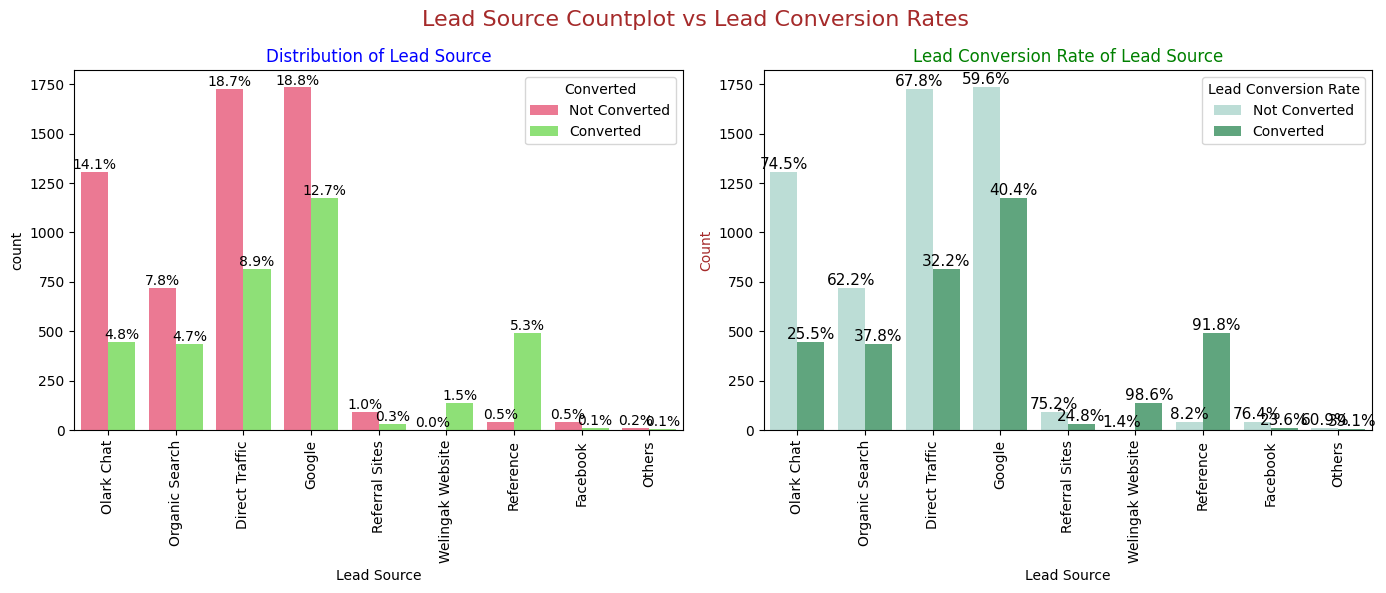

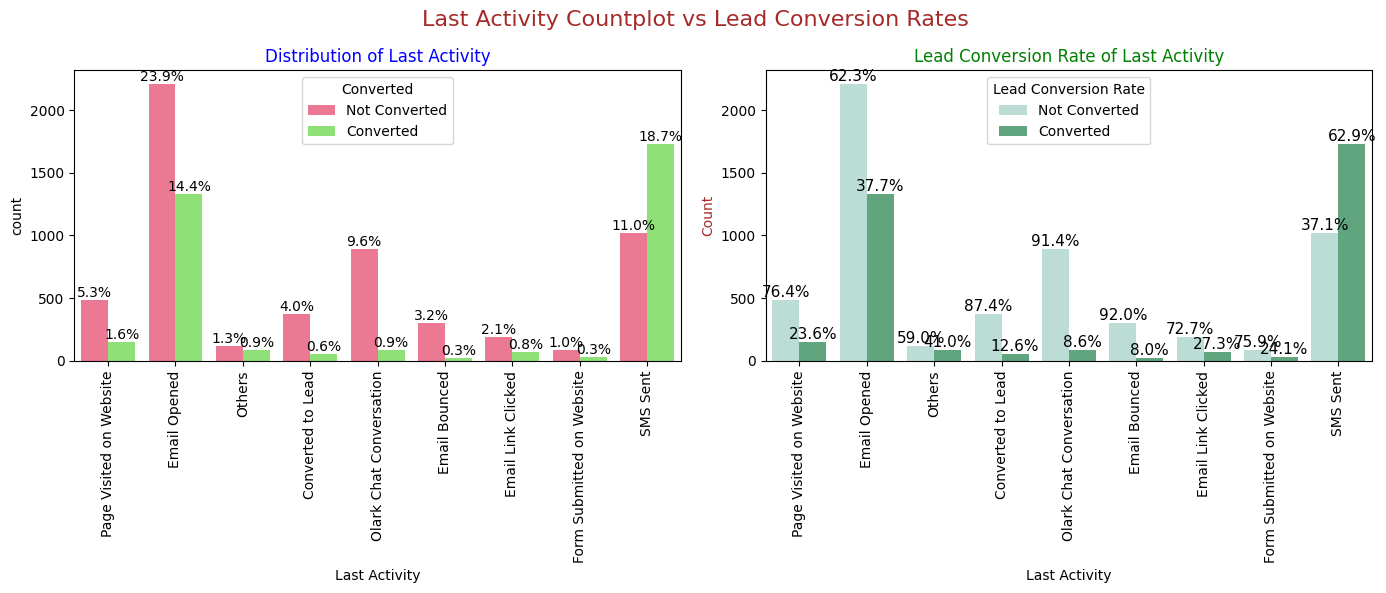

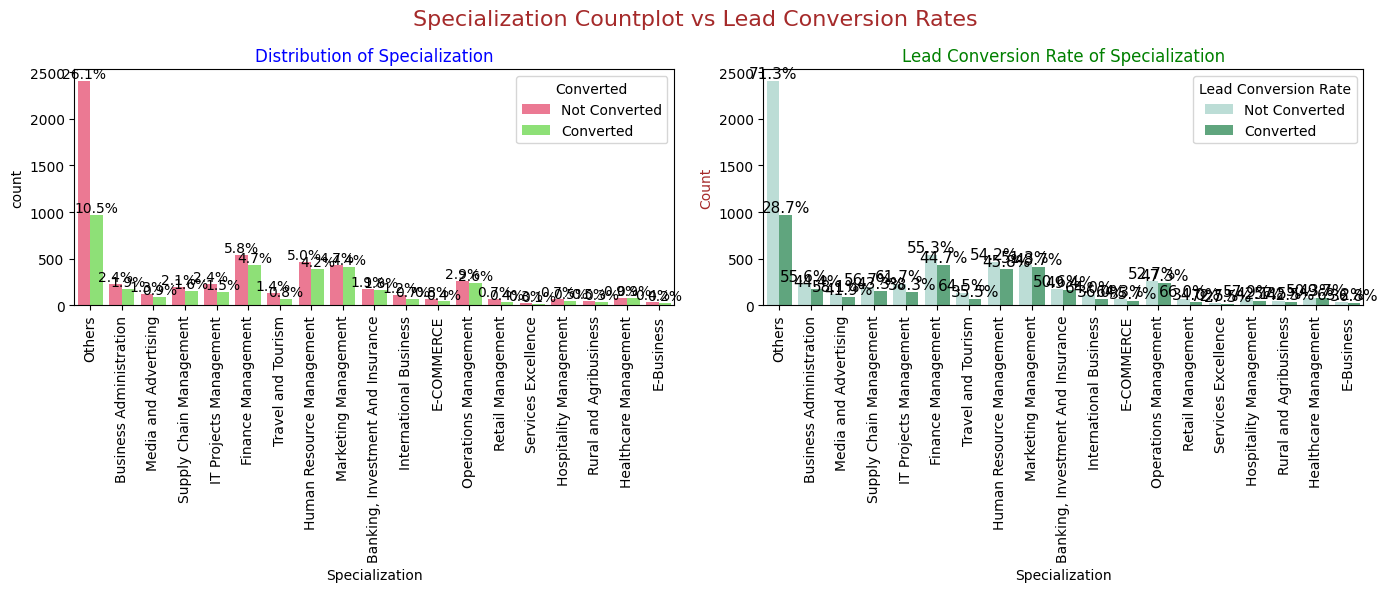

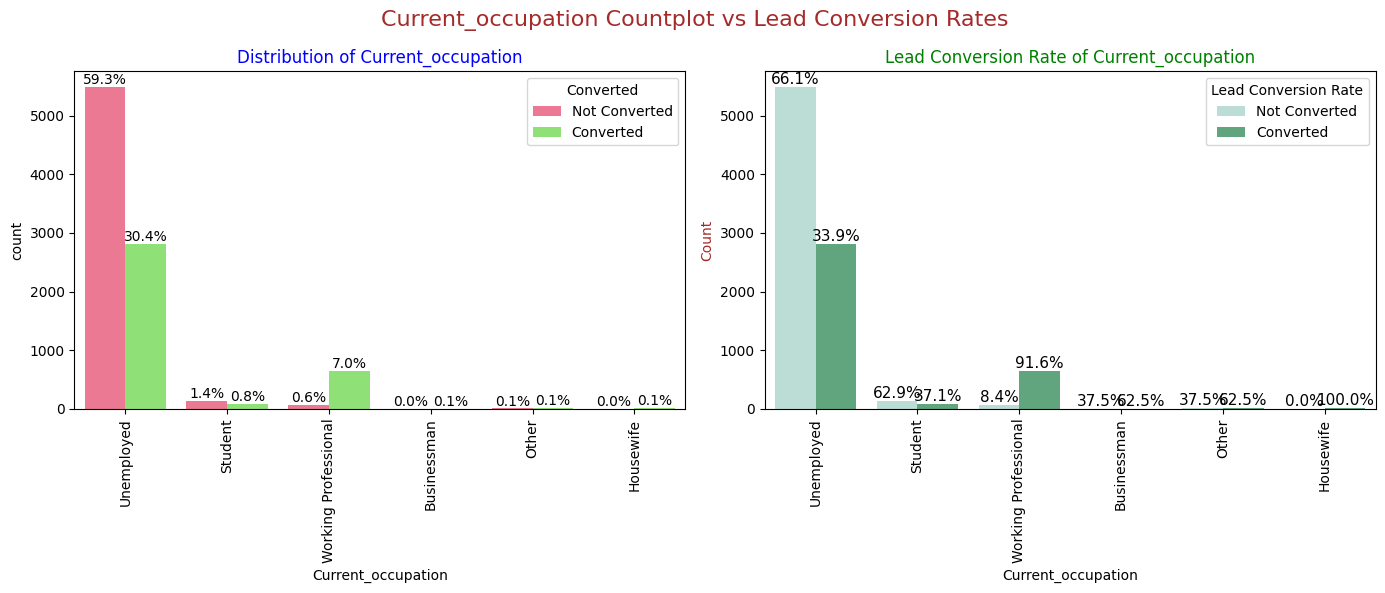

In [58]:
for col in eda_category:
    Bivariate_cat(lead_score,variable_name=col)

<Figure size 1600x400 with 0 Axes>

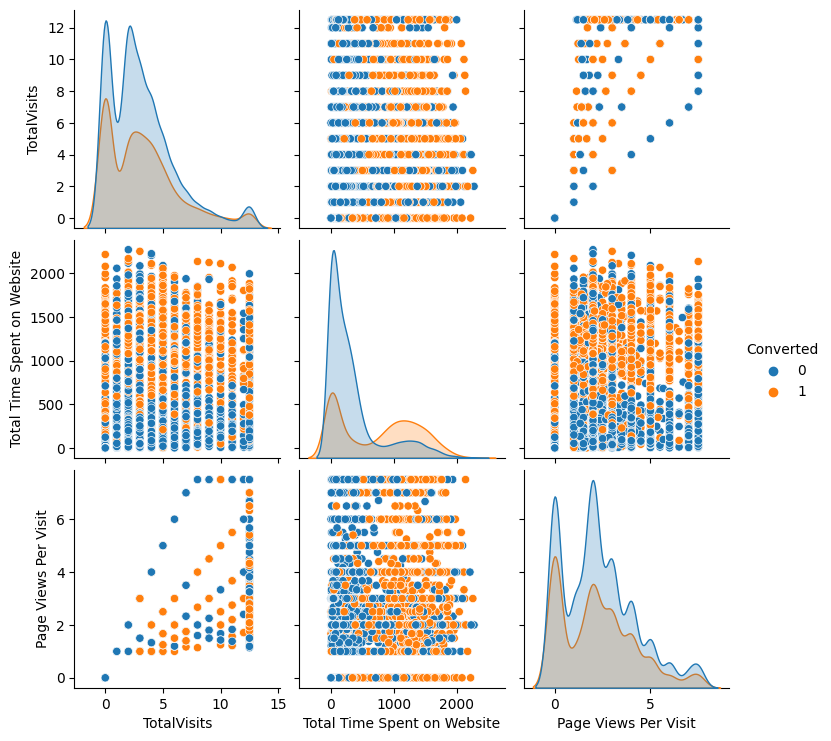

In [59]:
plt.figure(figsize=(16, 4))
sns.pairplot(data=lead_score,vars=eda_numeric,hue="Converted")                                  
plt.show()

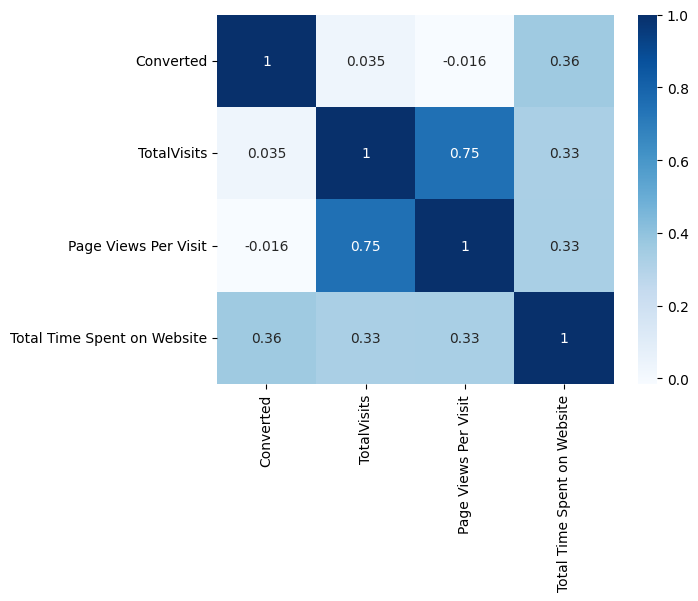

In [60]:
num_cols =["Converted",'TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']
sns.heatmap(data=lead_score[num_cols].corr() , annot=True , cmap='Blues')
plt.show()

In [61]:
lead_score.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Current_occupation,Free_copy
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,0


### Data Preparation :
#### Dummy Variables

In [62]:
dummy = pd.get_dummies(lead_score[['Lead Origin' , 'Lead Source' , 'Last Activity' , 
                                   'Specialization' , 'Current_occupation']] , drop_first=True).astype('int')

In [63]:
lead_score =pd.concat([lead_score,dummy] , axis=1)

In [64]:
lead_score.drop(['Lead Origin' , 'Lead Source' , 'Last Activity' , 'Specialization' , 'Current_occupation'] , axis=1 , inplace = True)

In [65]:
lead_score.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Free_copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current_occupation_Housewife,Current_occupation_Other,Current_occupation_Student,Current_occupation_Unemployed,Current_occupation_Working Professional
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [66]:
lead_score.shape

(9240, 49)

In [67]:
y = lead_score['Converted']
X = lead_score.drop(['Converted'],axis=1)

In [68]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [69]:
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Free_copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current_occupation_Housewife,Current_occupation_Other,Current_occupation_Student,Current_occupation_Unemployed,Current_occupation_Working Professional
0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,0,2.0,1428,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


### Train Teat Split

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train , X_test , y_train , y_test = train_test_split(X , y , train_size=0.7 , test_size=0.3 , random_state=100)

In [72]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6468, 48)
(6468,)
(2772, 48)
(2772,)


### Feature Scaling

In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [74]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6468 entries, 1871 to 5640
Data columns (total 48 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              6468 non-null   int64  
 1   TotalVisits                               6468 non-null   float64
 2   Total Time Spent on Website               6468 non-null   int64  
 3   Page Views Per Visit                      6468 non-null   float64
 4   Free_copy                                 6468 non-null   int64  
 5   Lead Origin_Landing Page Submission       6468 non-null   int32  
 6   Lead Origin_Lead Add Form                 6468 non-null   int32  
 7   Lead Origin_Lead Import                   6468 non-null   int32  
 8   Lead Origin_Quick Add Form                6468 non-null   int32  
 9   Lead Source_Facebook                      6468 non-null   int32  
 10  Lead Source_Google                    

In [75]:
num=['Do Not Email','TotalVisits','Total Time Spent on Website','Page Views Per Visit','Free_copy']

In [76]:
X_train[num] = scaler.fit_transform(X_train[num])

In [77]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Free_copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current_occupation_Housewife,Current_occupation_Other,Current_occupation_Student,Current_occupation_Unemployed,Current_occupation_Working Professional
1871,-0.291638,-1.064974,-0.885371,-1.184892,-0.673169,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
6795,-0.291638,0.262370,0.005716,-0.488713,1.485511,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3516,-0.291638,0.594206,-0.691418,0.123715,-0.673169,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
8105,-0.291638,0.594206,1.365219,1.432322,-0.673169,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3934,-0.291638,-1.064974,-0.885371,-1.184892,-0.673169,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


### Correlations :
#### Looking for multicolinearity

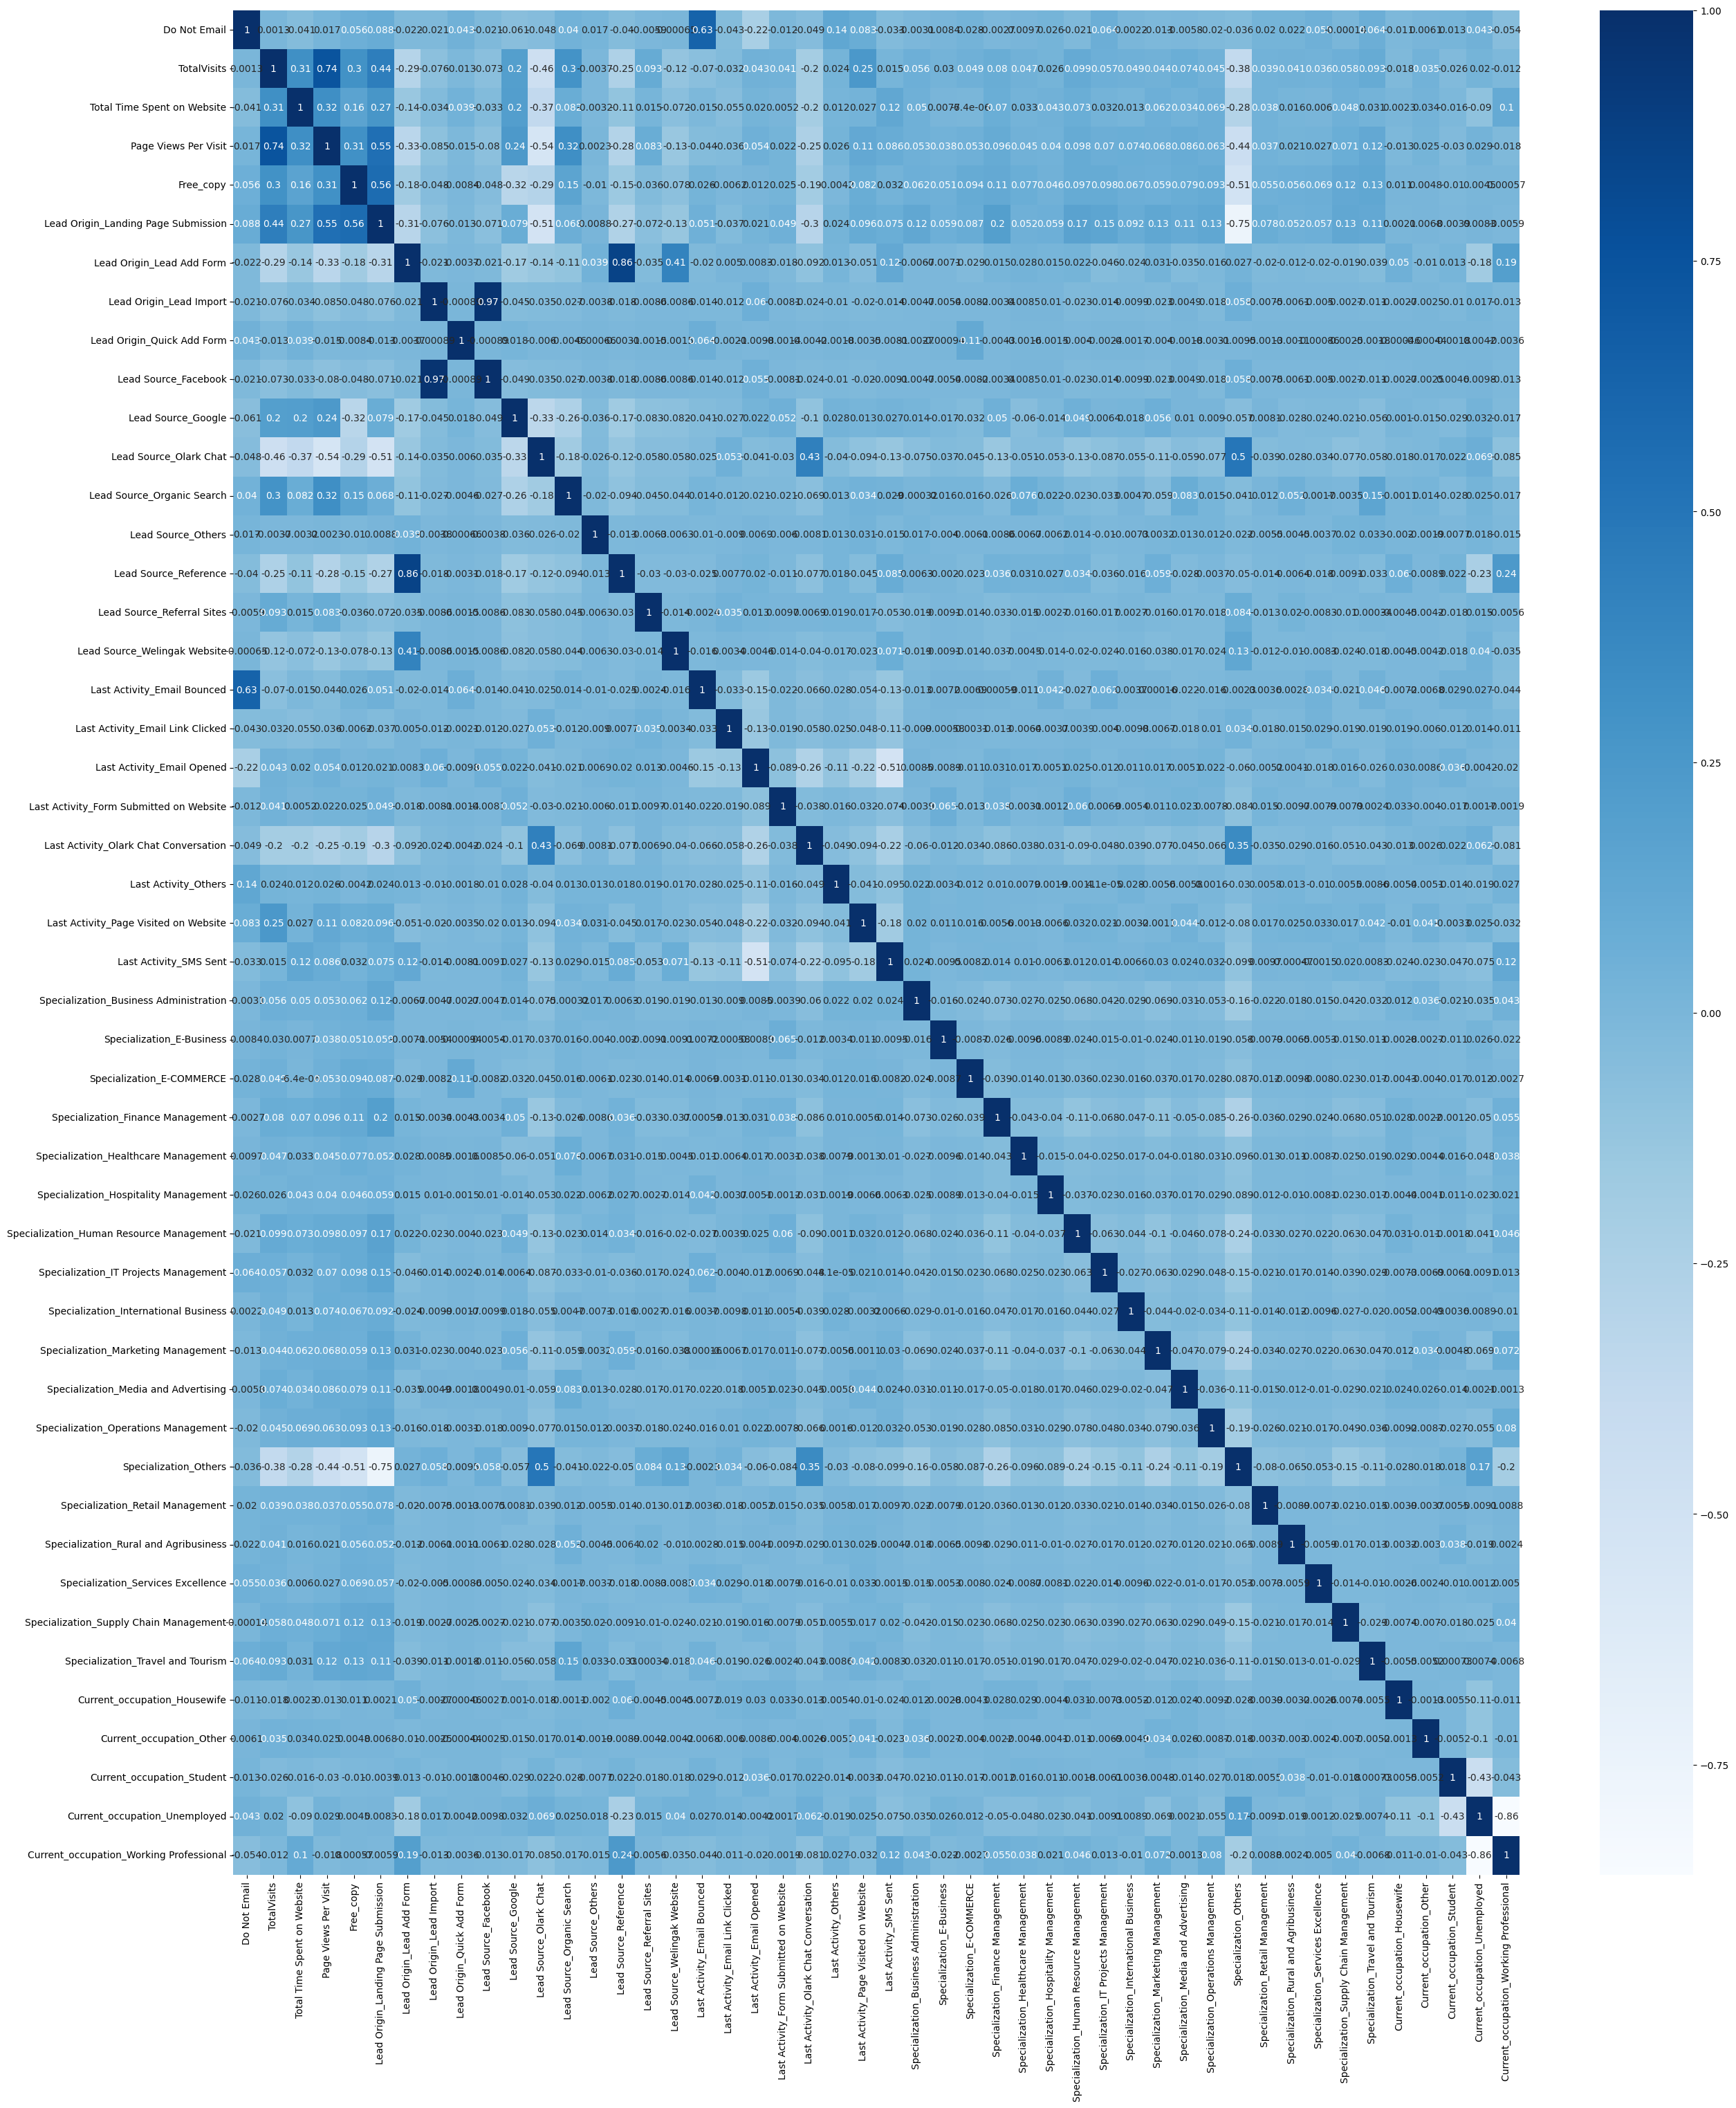

In [78]:
plt.figure(figsize=(30,35))
sns.heatmap(data= X_train.corr() , annot=True , cmap = 'Blues')
plt.show()

In [79]:
multicolinearity = ["Lead Source_Facebook","Lead Origin_Lead Import","Lead Origin_Lead Add Form","Lead Source_Reference"]
corr = lead_score[multicolinearity].corr()

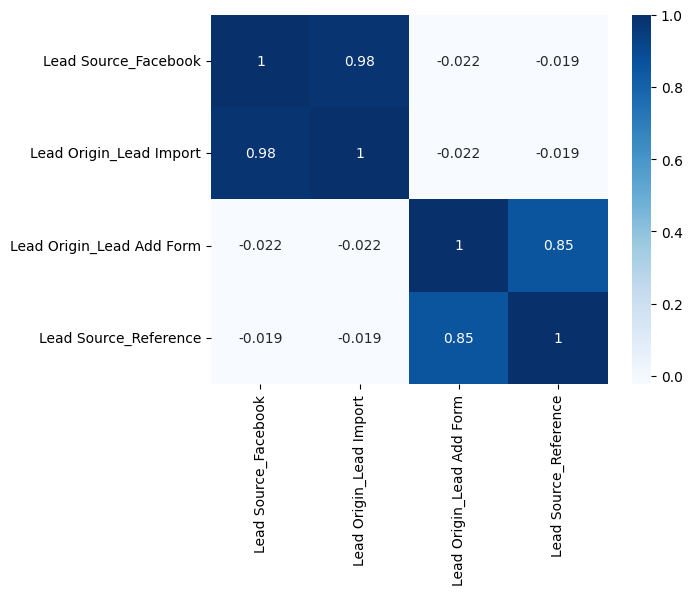

In [80]:
sns.heatmap(corr , annot=True, cmap='Blues')
plt.show()

#### Dropping highly correlated values

In [81]:
X_test = X_test.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],axis=1)

X_train = X_train.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],axis=1)

### Model Building :

- Building Logistic Regression Model for predicting categorical variable
- Feature Selection Using RFE 
- Manual fine-tuning using p-values and VIFs

In [82]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.feature_selection import RFE

In [83]:
logreg = LogisticRegression()
rfe = RFE( logreg , n_features_to_select=15)
rfe = rfe.fit(X_train , y_train)

In [84]:
rfe_col=X_train.columns[rfe.support_]
rfe_col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Facebook', 'Lead Source_Olark Chat', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'Current_occupation_Housewife',
       'Current_occupation_Working Professional'],
      dtype='object')

In [85]:
# Model 1

X_train_rfe = X_train[rfe_col]
X_train_sm  = sm.add_constant(X_train_rfe)
logm1 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial()).fit()
logm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2732.8
Date:                Tue, 11 Jun 2024   Deviance:                       5465.5
Time:                        14:17:28   Pearson chi2:                 8.09e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3839
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.0333      0.144     -7.155      0.000      -1.316      -0.750
Total Time Spent on Website                 1.0505      0.039     27.169      0.000       0.975       1.126
Lead Origin_Landing Page Submission        -1.2721      0.126    -10.059      0.000      -1.520      -1.024
Lead Source_Facebook                       -0.6961      0.529     -1.316      0.188      -1.733       0.340
Lead Source_Olark Chat                      0.9001      0.119      7.585      0.000       0.668       1.133
Lead Source_Others                          0.9807      0.512      1.915      0.056      -0.023       1.985
Lead Source_Reference                       2.8977      0.216     13.434      0.000       2.475       3.320
Lead Source_Welingak Website                5.3802      0.729      7.384      0.000       3.952       6.808
Last Activity_Email Opened                  0.9506      0.105      9.061      0.000       0.745       1.156
Last Activity_Olark Chat Conversation      -0.5534      0.187     -2.956      0.003      -0.920      -0.186
Last Activity_Others                        1.2580      0.238      5.276      0.000       0.791       1.725
Last Activity_SMS Sent                      2.0688      0.108     19.188      0.000       1.857       2.280
Specialization_Hospitality Management      -1.0720      0.324     -3.310      0.001      -1.707      -0.437
Specialization_Others                      -1.1937      0.121     -9.841      0.000      -1.431      -0.956
Current_occupation_Housewife               23.0222   1.33e+04      0.002      0.999    -2.6e+04     2.6e+04
Current_occupation_Working Professional     2.6855      0.190     14.104      0.000       2.312       3.059
===========================================================================================================
"""

##### Note : 'Current_occupation_Housewife' column has a high p-value of 0.999, The accepted threshold of is 0.05 for statistical significance.So the column will be dropped

In [86]:
rfe_col=rfe_col.drop('Current_occupation_Housewife')


In [87]:
# Model 2

X_train_rfe2 = X_train[rfe_col]
X_train_sm2  = sm.add_constant(X_train_rfe2)
logm2 = sm.GLM(y_train,X_train_sm2,family=sm.families.Binomial()).fit()
logm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2740.3
Date:                Tue, 11 Jun 2024   Deviance:                       5480.7
Time:                        14:17:29   Pearson chi2:                 8.12e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3825
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.0251      0.144     -7.111      0.000      -1.308      -0.743
Total Time Spent on Website                 1.0494      0.039     27.177      0.000       0.974       1.125
Lead Origin_Landing Page Submission        -1.2674      0.126    -10.030      0.000      -1.515      -1.020
Lead Source_Facebook                       -0.6969      0.529     -1.318      0.187      -1.733       0.339
Lead Source_Olark Chat                      0.8991      0.119      7.580      0.000       0.667       1.132
Lead Source_Others                          0.9739      0.512      1.902      0.057      -0.030       1.977
Lead Source_Reference                       2.9171      0.215     13.538      0.000       2.495       3.339
Lead Source_Welingak Website                5.3791      0.729      7.384      0.000       3.951       6.807
Last Activity_Email Opened                  0.9490      0.105      9.077      0.000       0.744       1.154
Last Activity_Olark Chat Conversation      -0.5583      0.187     -2.985      0.003      -0.925      -0.192
Last Activity_Others                        1.2482      0.238      5.238      0.000       0.781       1.715
Last Activity_SMS Sent                      2.0588      0.108     19.151      0.000       1.848       2.270
Specialization_Hospitality Management      -1.0795      0.324     -3.334      0.001      -1.714      -0.445
Specialization_Others                      -1.1978      0.121     -9.881      0.000      -1.435      -0.960
Current_occupation_Working Professional     2.6773      0.190     14.068      0.000       2.304       3.050
===========================================================================================================
"""

##### Note : 'Lead Source_Facebook' column has a  p-value of 0.187, The accepted threshold of is 0.05 for statistical significance.So the column will be dropped

In [88]:
rfe_col = rfe_col.drop('Lead Source_Facebook')

In [89]:
# model 3

X_train_rfe3 = X_train[rfe_col]
X_train_sm3 = sm.add_constant(X_train_rfe3)
logm3 = sm.GLM(y_train,X_train_sm3,family=sm.families.Binomial()).fit()
logm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2741.3
Date:                Tue, 11 Jun 2024   Deviance:                       5482.6
Time:                        14:17:29   Pearson chi2:                 8.12e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3823
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.0405      0.144     -7.245      0.000      -1.322      -0.759
Total Time Spent on Website                 1.0518      0.039     27.262      0.000       0.976       1.127
Lead Origin_Landing Page Submission        -1.2493      0.125     -9.958      0.000      -1.495      -1.003
Lead Source_Olark Chat                      0.9169      0.118      7.773      0.000       0.686       1.148
Lead Source_Others                          0.9814      0.512      1.917      0.055      -0.022       1.985
Lead Source_Reference                       2.9372      0.215     13.661      0.000       2.516       3.359
Lead Source_Welingak Website                5.3967      0.728      7.409      0.000       3.969       6.824
Last Activity_Email Opened                  0.9434      0.105      9.028      0.000       0.739       1.148
Last Activity_Olark Chat Conversation      -0.5582      0.187     -2.984      0.003      -0.925      -0.192
Last Activity_Others                        1.2487      0.238      5.239      0.000       0.782       1.716
Last Activity_SMS Sent                      2.0555      0.107     19.124      0.000       1.845       2.266
Specialization_Hospitality Management      -1.0904      0.323     -3.377      0.001      -1.723      -0.458
Specialization_Others                      -1.1943      0.121     -9.873      0.000      -1.431      -0.957
Current_occupation_Working Professional     2.6757      0.190     14.063      0.000       2.303       3.049
===========================================================================================================
"""

##### Note : 'Lead Source_Others' column has a  p-value of 0.055, The accepted threshold of is 0.05 for statistical significance.So the column will be dropped

In [90]:
rfe_col = rfe_col.drop('Lead Source_Others')

In [91]:
# model4

X_train_rfe4 = X_train_rfe3[rfe_col]
X_train_sm4 = sm.add_constant(X_train_rfe4)
logm4 = sm.GLM(y_train,X_train_sm4,family=sm.families.Binomial()).fit()
logm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2743.1
Date:                Tue, 11 Jun 2024   Deviance:                       5486.1
Time:                        14:17:29   Pearson chi2:                 8.11e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3819
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.0236      0.143     -7.145      0.000      -1.304      -0.743
Total Time Spent on Website                 1.0498      0.039     27.234      0.000       0.974       1.125
Lead Origin_Landing Page Submission        -1.2590      0.125    -10.037      0.000      -1.505      -1.013
Lead Source_Olark Chat                      0.9072      0.118      7.701      0.000       0.676       1.138
Lead Source_Reference                       2.9253      0.215     13.615      0.000       2.504       3.346
Lead Source_Welingak Website                5.3887      0.728      7.399      0.000       3.961       6.816
Last Activity_Email Opened                  0.9421      0.104      9.022      0.000       0.737       1.147
Last Activity_Olark Chat Conversation      -0.5556      0.187     -2.974      0.003      -0.922      -0.189
Last Activity_Others                        1.2531      0.238      5.259      0.000       0.786       1.720
Last Activity_SMS Sent                      2.0519      0.107     19.106      0.000       1.841       2.262
Specialization_Hospitality Management      -1.0944      0.323     -3.391      0.001      -1.727      -0.462
Specialization_Others                      -1.2033      0.121     -9.950      0.000      -1.440      -0.966
Current_occupation_Working Professional     2.6697      0.190     14.034      0.000       2.297       3.042
===========================================================================================================
"""

#### Note : The p values are all under the threshold. Looking for VIF now.

In [92]:
# Check vif

from statsmodels.stats.outliers_influence import variance_inflation_factor


vif = pd.DataFrame()
vif['Features'] = X_train_rfe4[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe4[rfe_col].values, i) for i in range(X_train_rfe4[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Specialization_Others,2.47
1,Lead Origin_Landing Page Submission,2.45
5,Last Activity_Email Opened,2.36
8,Last Activity_SMS Sent,2.20
2,Lead Source_Olark Chat,2.14
6,Last Activity_Olark Chat Conversation,1.72
3,Lead Source_Reference,1.31
0,Total Time Spent on Website,1.24
11,Current_occupation_Working Professional,1.21
4,Lead Source_Welingak Website,1.08


#### Note:  The VIF values are all under accepted threshold of 1 to 5 as well so the values are statistically significant. So we will proceed to model evaluation with this model.

### Model Evaluation :

- Confusion Matrix
- Accuracy
- Sensitivity and Specificity
- Threshold determination using ROC & Finding Optimal cutoff point
- Precision and Recall

In [93]:
from sklearn.metrics import confusion_matrix

In [94]:
y_train_pred = logm4.predict(X_train_sm4)
y_train_pred.head()

1871    0.474082
6795    0.073252
3516    0.249087
8105    0.768973
3934    0.212973
dtype: float64

In [95]:
# Creating a dataframe with the actual churn data and the predicted probabilities

prediction = pd.DataFrame({'Converted' : y_train.values , 'Converting_Probability' : y_train_pred , 'Prospect_ID' : y_train.index})
prediction.head()

,Converted,Converting_Probability,Prospect_ID
1871,0,0.474082,1871
6795,0,0.073252,6795
3516,0,0.249087,3516
8105,0,0.768973,8105
3934,0,0.212973,3934


##### Note : We have to find the optimal cutoff Threshold value of Probability. Let's start with default 0.5 value and add a new feature predicted in above dataframe using the probabilities

In [96]:
prediction['Predicted'] = prediction['Converting_Probability'].map(lambda x : 1 if x>0.5 else 0)

In [97]:
prediction.head()

,Converted,Converting_Probability,Prospect_ID,Predicted
1871,0,0.474082,1871,0
6795,0,0.073252,6795,0
3516,0,0.249087,3516,0
8105,0,0.768973,8105,1
3934,0,0.212973,3934,0


In [98]:
confusion = confusion_matrix(prediction['Converted'],prediction['Predicted'])
confusion

array([[3588,  414],
       [ 846, 1620]], dtype=int64)

In [99]:
# Predicted        not_converted  |  converted
# Actual                          |
# -----------------------------------------------------
# not_converted       3588       |   414
# converted           846        |   1620  


In [100]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(prediction['Predicted'],prediction['Converted'])
round(accuracy*100,2)

80.52

In [101]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [102]:
sensitivity = round((TP/(TP+FN))*100,2)
sensitivity

65.69

In [103]:
speficity = round((TN/(TN+FP))*100,2)
speficity

89.66

##### Note : With the cut off of 0.5 we have  
 1. Accuracy = 80.52%
 2. Sensitivity = 65.69%
 3. Specificity = 89.66%

##### Threshold determination using ROC & Finding Optimal cutoff point

A ROC (Receiver Operating Characteristic) curve is a graph that shows how well a model can distinguish between two things (e.g., positive and negative outcomes). It helps visualize the trade-off between correctly identifying true positives and incorrectly identifying false positives at different decision thresholds. The closer the curve is to the top-left corner, the better the model performs.

In [104]:
from sklearn import metrics

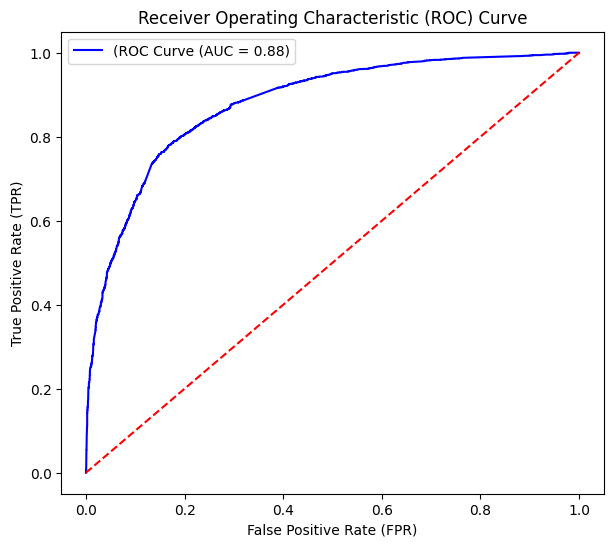

In [105]:
auc = metrics.roc_auc_score(prediction.Converted,prediction.Converting_Probability)
fpr, tpr, thresholds = metrics.roc_curve(prediction.Converted,prediction.Converting_Probability,
                                              drop_intermediate = False )
plt.figure(figsize=(7,6))
plt.plot(fpr , tpr , color='blue' , label = f'(ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


#### Note : The area under ROC curve is 0.88 which indicates good predictive model

### Finding Optimal Cutoff Point

In [106]:
# Optimal cut off

numbers =[ x/10 for x in range(10)]
numbers

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [107]:
for i in numbers:
    prediction[i] = prediction['Converting_Probability'].map(lambda x : 1 if x > i else 0)

In [108]:
prediction.head()

,Converted,Converting_Probability,Prospect_ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1871,0,0.474082,1871,0,1,1,1,1,1,0,0,0,0,0
6795,0,0.073252,6795,0,1,0,0,0,0,0,0,0,0,0
3516,0,0.249087,3516,0,1,1,1,0,0,0,0,0,0,0
8105,0,0.768973,8105,1,1,1,1,1,1,1,1,1,0,0
3934,0,0.212973,3934,0,1,1,1,0,0,0,0,0,0,0


In [109]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])


# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(prediction.Converted, prediction[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.595702  0.973642  0.362819
0.2   0.2  0.721243  0.920114  0.598701
0.3   0.3  0.791280  0.832928  0.765617
0.4   0.4  0.813698  0.763585  0.844578
0.5   0.5  0.805195  0.656934  0.896552
0.6   0.6  0.792981  0.585969  0.920540
0.7   0.7  0.779066  0.507705  0.946277
0.8   0.8  0.754020  0.405515  0.968766
0.9   0.9  0.707792  0.247364  0.991504


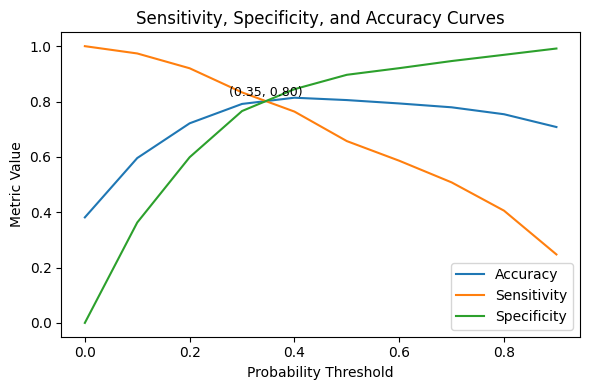

In [110]:
from scipy.interpolate import interp1d
from scipy.optimize import fsolve

sensi_interp = interp1d(cutoff_df['prob'], cutoff_df['sensi'], kind='linear')
acc_interp = interp1d(cutoff_df['prob'], cutoff_df['accuracy'], kind='linear')
speci_interp = interp1d(cutoff_df['prob'], cutoff_df['speci'], kind='linear')
intersection_x = fsolve(lambda x: sensi_interp(x) - acc_interp(x), 0.5)[0]
plt.figure(figsize=(6, 4))
plt.plot(cutoff_df['prob'], cutoff_df['accuracy'], label='Accuracy')
plt.plot(cutoff_df['prob'], cutoff_df['sensi'], label='Sensitivity')
plt.plot(cutoff_df['prob'], cutoff_df['speci'], label='Specificity')
plt.text(intersection_x, acc_interp(intersection_x) + 0.02, f'({intersection_x:.2f}, {acc_interp(intersection_x):.2f})',
         ha='center', fontsize=9)
plt.xlabel('Probability Threshold')
plt.ylabel('Metric Value')
plt.title('Sensitivity, Specificity, and Accuracy Curves')
plt.legend()
plt.tight_layout()
plt.show()

#### Note :  From the graph it can be said that the optimal cut off is at 0.35

In [111]:
prediction.head()

,Converted,Converting_Probability,Prospect_ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1871,0,0.474082,1871,0,1,1,1,1,1,0,0,0,0,0
6795,0,0.073252,6795,0,1,0,0,0,0,0,0,0,0,0
3516,0,0.249087,3516,0,1,1,1,0,0,0,0,0,0,0
8105,0,0.768973,8105,1,1,1,1,1,1,1,1,1,0,0
3934,0,0.212973,3934,0,1,1,1,0,0,0,0,0,0,0


#### Note : Again add a new feature predicted in above dataframe using the probabilities with now calculated optimal cut off

In [112]:
prediction['Final_Predicted'] = prediction['Converting_Probability'].map(lambda x: 1 if x>0.35 else 0)

In [113]:
prediction.head()

,Converted,Converting_Probability,Prospect_ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
1871,0,0.474082,1871,0,1,1,1,1,1,0,0,0,0,0,1
6795,0,0.073252,6795,0,1,0,0,0,0,0,0,0,0,0,0
3516,0,0.249087,3516,0,1,1,1,0,0,0,0,0,0,0,0
8105,0,0.768973,8105,1,1,1,1,1,1,1,1,1,0,0,1
3934,0,0.212973,3934,0,1,1,1,0,0,0,0,0,0,0,0


##### Dropping unnecessary columns

In [114]:
prediction.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,'Predicted'],axis=1,inplace=True)

In [115]:
prediction.head()

,Converted,Converting_Probability,Prospect_ID,Final_Predicted
1871,0,0.474082,1871,1
6795,0,0.073252,6795,0
3516,0,0.249087,3516,0
8105,0,0.768973,8105,1
3934,0,0.212973,3934,0


In [116]:
confusion_matrix = confusion_matrix(prediction.Converted,prediction.Final_Predicted)
confusion_matrix

array([[3245,  757],
       [ 500, 1966]], dtype=int64)

In [117]:
accuracy2 = accuracy_score(prediction.Converted,prediction.Final_Predicted)
round(accuracy2*100,2)

80.57

In [118]:
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

In [119]:
sensitivity2 = round((TP/(TP+FN))*100,2)
sensitivity2

79.72

In [120]:
specificity2 = round((TN/(TN+FP))*100,2)
specificity2

81.08

#### Note : With the cut off of 0.35 we have
 1. Accuracy = 80.57%
 2. Sensitivity = 79.72%
 3. Specificity = 81.08%

#### Precison - Recall

In [121]:
precision = TP/(TP+FP)
precision = round(precision*100,2)
precision

72.2

In [122]:
recall = TP/(TP+FN)
recall = round(recall*100,2)
recall

79.72

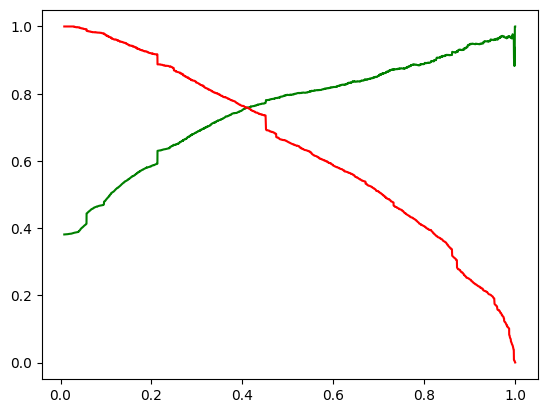

In [123]:
# precision-recall tradeoff curve

from sklearn.metrics import precision_recall_curve
prediction.Converted , prediction.Final_Predicted
p ,r , thresholds = precision_recall_curve(prediction.Converted , prediction.Converting_Probability)

plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")
plt.show()

In [124]:
prediction.head()

,Converted,Converting_Probability,Prospect_ID,Final_Predicted
1871,0,0.474082,1871,1
6795,0,0.073252,6795,0
3516,0,0.249087,3516,0
8105,0,0.768973,8105,1
3934,0,0.212973,3934,0


#### Note : Adding Lead Score to Training set
 - A higher score would mean that the lead is most likely to convert.

   
 - Whereas a lower score would mean that the lead is most likely not convert.

In [125]:
prediction['Lead_Score'] = prediction.Converting_Probability.map(lambda x : round(x*100))

In [126]:
prediction.head()

,Converted,Converting_Probability,Prospect_ID,Final_Predicted,Lead_Score
1871,0,0.474082,1871,1,47
6795,0,0.073252,6795,0,7
3516,0,0.249087,3516,0,25
8105,0,0.768973,8105,1,77
3934,0,0.212973,3934,0,21


### Prediction on Test set


In [127]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2772 entries, 4269 to 2960
Data columns (total 46 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              2772 non-null   int64  
 1   TotalVisits                               2772 non-null   float64
 2   Total Time Spent on Website               2772 non-null   int64  
 3   Page Views Per Visit                      2772 non-null   float64
 4   Free_copy                                 2772 non-null   int64  
 5   Lead Origin_Landing Page Submission       2772 non-null   int32  
 6   Lead Origin_Quick Add Form                2772 non-null   int32  
 7   Lead Source_Facebook                      2772 non-null   int32  
 8   Lead Source_Google                        2772 non-null   int32  
 9   Lead Source_Olark Chat                    2772 non-null   int32  
 10  Lead Source_Organic Search            

In [128]:
# fetching int64 and float64 dtype columns from dataframe for scaling
num_cols=X_test.select_dtypes(include=['int64','float64']).columns

# scaling columns
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_test = X_test[rfe_col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Specialization_Hospitality Management,Specialization_Others,Current_occupation_Working Professional
4269,0.964504,0,0,0,0,0,0,0,1,0,1,0
2376,-0.885371,0,0,1,0,0,0,0,1,0,1,0
7766,-0.777416,0,0,0,0,0,0,1,0,0,0,1
9199,-0.885371,0,1,0,0,0,1,0,0,0,1,0
4359,-0.885371,0,0,1,0,1,0,0,0,0,0,0


In [129]:
X_test_sm = sm.add_constant(X_test)

In [130]:
y_test_pred = logm4.predict(X_test_sm)

In [131]:
y_test_pred.head()

4269    0.697934
2376    0.860665
7766    0.889241
9199    0.057065
4359    0.871510
dtype: float64

In [132]:
y_test_df = pd.DataFrame(y_test)
y_test_df['Prostpect_ID'] = y_test.index
y_test_pred_df = pd.DataFrame(y_test_pred)

In [133]:
y_test_df.reset_index(drop=True,inplace=True)
y_test_pred_df.reset_index(drop=True,inplace=True)
y_test_pred_final = pd.concat([y_test_df,y_test_pred_df],axis=1)

In [134]:
y_test_pred_final.head()

,Converted,Prostpect_ID,0
0,1,4269,0.697934
1,1,2376,0.860665
2,1,7766,0.889241
3,0,9199,0.057065
4,1,4359,0.871510


In [135]:
y_test_pred_final=y_test_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [136]:
y_test_pred_final['Final_Predicted'] = y_test_pred_final.Converted_Prob.map(lambda x : 1 if x > 0.35 else 0)

In [137]:
y_test_pred_final.head()

,Converted,Prostpect_ID,Converted_Prob,Final_Predicted
0,1,4269,0.697934,1
1,1,2376,0.860665,1
2,1,7766,0.889241,1
3,0,9199,0.057065,0
4,1,4359,0.871510,1


##### Plotting ROC Curve or Test Data

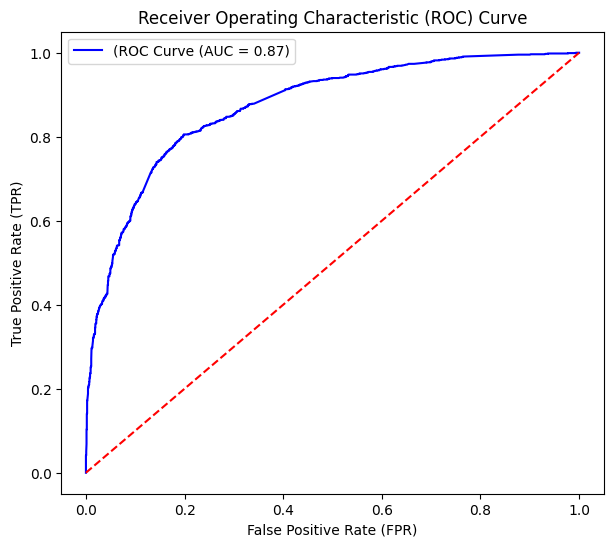

In [138]:


auc = metrics.roc_auc_score(y_test_pred_final.Converted,y_test_pred_final.Converted_Prob)
fpr, tpr, thresholds = metrics.roc_curve( y_test_pred_final.Converted , y_test_pred_final.Converted_Prob , drop_intermediate=False)
plt.figure(figsize=(7,6))
plt.plot(fpr , tpr , color='blue' , label = f'(ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

##### Note : Area under ROC curve is 0.87 out of 1 which indicates a good predictive model

In [139]:
# Confusion matrix 

confusion_matrix = metrics.confusion_matrix(y_test_pred_final['Converted'], y_test_pred_final['Final_Predicted'])
confusion_matrix

array([[1359,  318],
       [ 227,  868]], dtype=int64)

In [140]:
accuracy = accuracy_score(y_test_pred_final['Converted'],y_test_pred_final['Final_Predicted'])
round(accuracy*100,2)

80.34

In [141]:
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

In [142]:
sensitivity = round((TP/(TP+FN))*100,2)
sensitivity

79.27

In [143]:
specificity = round((TN/(TN+FP))*100,2)
specificity

81.04

##### For Test set

    
 1. Accuracy = 80.34%
 2. Sensitivity = 79.27% ≈ 80%
 3. Specificity = 81.04%
    
##### These matrics are very close to train set, so out final model is  performing with good consistency on both Train & Test set

In [144]:
# features and their coefficicent from final model
parameters=logm4.params.sort_values(ascending=False)
parameters

Lead Source_Welingak Website               5.388662
Lead Source_Reference                      2.925326
Current_occupation_Working Professional    2.669665
Last Activity_SMS Sent                     2.051879
Last Activity_Others                       1.253061
Total Time Spent on Website                1.049789
Last Activity_Email Opened                 0.942099
Lead Source_Olark Chat                     0.907184
Last Activity_Olark Chat Conversation     -0.555605
const                                     -1.023594
Specialization_Hospitality Management     -1.094445
Specialization_Others                     -1.203333
Lead Origin_Landing Page Submission       -1.258954
dtype: float64

In [145]:
y_test_pred_final['Lead_Score'] = y_test_pred_final.Converted_Prob.map(lambda x : round(x*100))

In [146]:
y_test_pred_final.head()

,Converted,Prostpect_ID,Converted_Prob,Final_Predicted,Lead_Score
0,1,4269,0.697934,1,70
1,1,2376,0.860665,1,86
2,1,7766,0.889241,1,89
3,0,9199,0.057065,0,6
4,1,4359,0.871510,1,87


## Conclusion : 

The evaluation matrics are pretty close to each other so it indicates that the model is performing consistently across different evaluation metrics in both test and train dataset.

- The model achieved a sensitivity of 79.72% in the train set and 79.27% in the test set, using a cut-off value of 0.35.
- Sensitivity in this case indicates how many leads the model identify correctly out of all potential leads which are converting
- `The CEO of X Education had set a target sensitivity of around 80%.`
- The model also achieved an accuracy of 80.57% in the train set and 80.34% in the test set which is in line with the study's objectives.

### Model parameters
- The final Logistic Regression Model has 13 features

 ### Top 3 features that contributing positively to predicting hot leads in the model are:



- Lead Source_Welingak Website

- Lead Source_Reference

- Current_occupation_Working Professional


#### Observations:

1. Focus on features with positive coefficients for targeted marketing strategies.

2. More budget can be spent on Welingak Website in terms of advertising ,marketing etc.

3. Working professionals to be can be targeted as they have high conversion rate and will be able to pay high fees too as they are financially able.

4. Areas with negative coefficients like 'Lead Origin_Landing Page Submission' should be analyzed and put more work on. 